# DS-80 Part 1 Final Project Presentation                    
Student：Charlotte Wan (万嘉威)

![title](picture.png)

**数据集说明**
来源于Kaggle，是一个记录美国某个地区学生的成绩与个人信息的数据集

**传送门**
https://www.kaggle.com/uciml/student-alcohol-consumption

# Content

## ·数据概览

## ·数据分析

## ·机器学习模型预测

## ·总结分析

In [4]:
import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "还原代码", True: "隐藏代码"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

ToggleButton(value=False, description='还原代码')

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

In [4]:
data1 = pd.read_csv("student-states/student-mat.csv",sep=",")
data2 = pd.read_csv("student-states/student-por.csv",sep=",")
data = [data1,data2]
data = pd.concat(data)
data = shuffle(data)

In [5]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## 数据概览(Data Overview)

### 检查缺失值

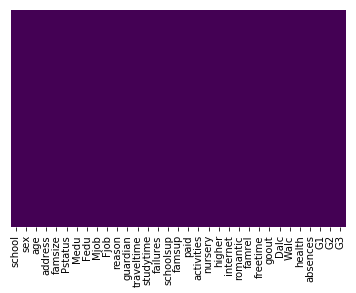

In [6]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

嗯嗯，看来这个Dataset挺perfect的^0^

In [7]:
data = data.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

### 数据大致情况

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 74 to 385
Data columns (total 33 columns):
school        662 non-null object
sex           662 non-null object
age           662 non-null int64
address       662 non-null object
famsize       662 non-null object
Pstatus       662 non-null object
Medu          662 non-null int64
Fedu          662 non-null int64
Mjob          662 non-null object
Fjob          662 non-null object
reason        662 non-null object
guardian      662 non-null object
traveltime    662 non-null int64
studytime     662 non-null int64
failures      662 non-null int64
schoolsup     662 non-null object
famsup        662 non-null object
paid          662 non-null object
activities    662 non-null object
nursery       662 non-null object
higher        662 non-null object
internet      662 non-null object
romantic      662 non-null object
famrel        662 non-null int64
freetime      662 non-null int64
goout         662 non-null int64
Dalc          662 n

两所学校的男女统计

percentage total female :  58.91238670694864
percentage total male :  41.08761329305136


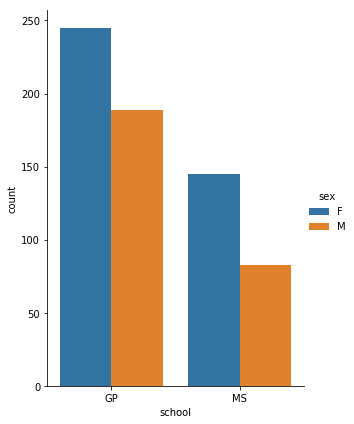

In [9]:
sns.catplot(x="school", hue = "sex" , data=data , kind="count",height=6, aspect=.7)
print("percentage total female : ",(data["sex"] == 'F').value_counts(normalize = True)[1]*100)
print("percentage total male : ",(data["sex"] == 'M').value_counts(normalize = True)[1]*100)

来看看他们的学习时间

In [10]:
data1['st_time'] = np.nan
df = [data1]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours'  
 
labels = data1["st_time"].unique().tolist()
amount = data1["st_time"].value_counts().tolist()

colors = ["ppt", "excel", "word", "note"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
dt = [trace]
layout = go.Layout(title="Study time")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')

In [3]:
import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "还原代码", True: "隐藏代码"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

ToggleButton(value=False, description='还原代码')

恋爱情况（重点中的重点:-3）

Text(0.5,1,'How many students are in romantic relationships')

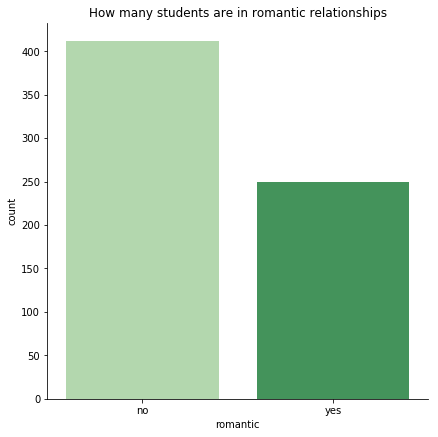

In [11]:
sns.catplot(x="romantic", kind="count",palette="Greens", data=data, height = 6)
plt.title("How many students are in romantic relationships")

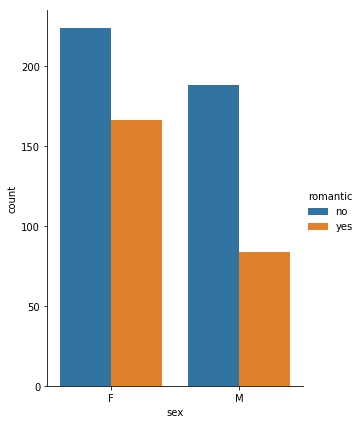

In [12]:
sns.catplot(x="sex", hue = "romantic", data=data , kind="count",height=6, aspect=.7)

士之耽兮，犹可说也。女之耽兮，不可说也！

Text(0.5,1,'Distribution of grades in people in love')

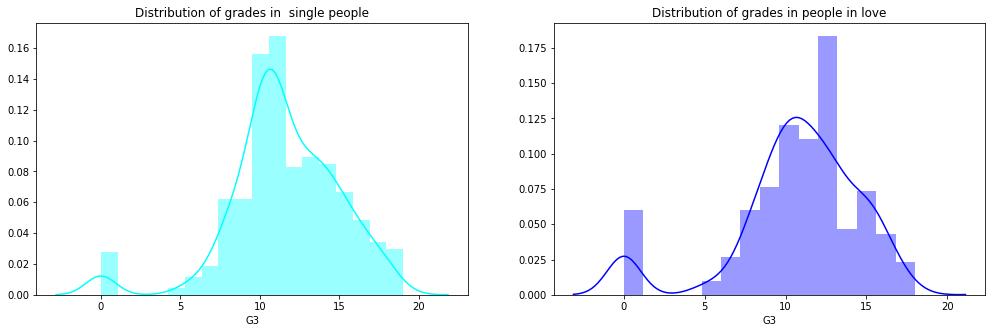

In [13]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]["G3"],color='blue',ax=ax)
ax.set_title('Distribution of grades in people in love')

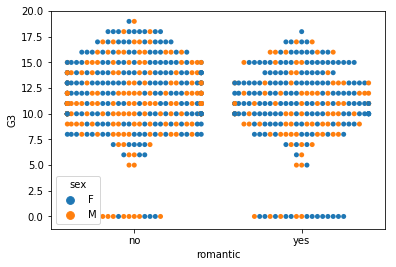

In [14]:
sns.swarmplot(x="romantic",y="G3",hue='sex',data=data)

早恋也没什么嘛

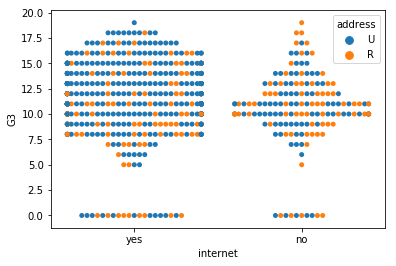

In [15]:
sns.swarmplot(x="internet",y="G3",hue='address',data=data)

貌似互联网有助于学习成绩的提高

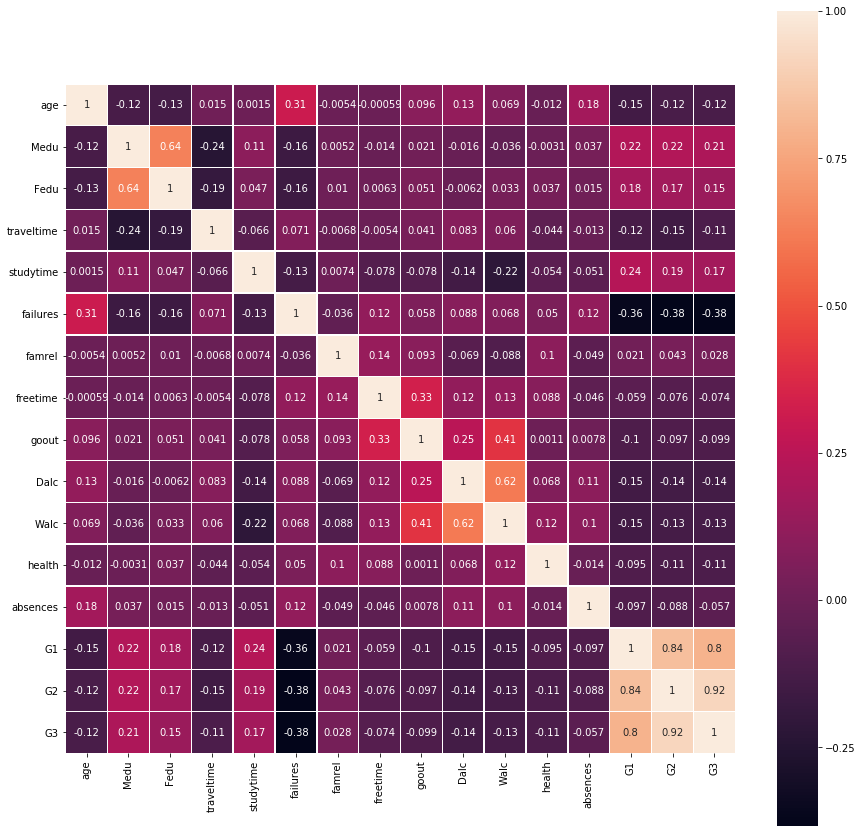

In [16]:
figure(figsize=(15, 15))
hmap = sns.heatmap(data.corr(), square=True, annot=True,linewidths=0.5)

**分析(水平不行别笑^.^)**
可以看到健康和饮酒之间有比较强的相关性，饮酒与失败之间的相关性也挺高的，学习时间与成绩有很好的相关性，父亲、母亲和失败也与成绩有很好的相关性，第一阶段和第二阶段的成绩与最终成绩有很大的相关性。但是，缺席和健康与成绩的相关性很低(这有点不科学T_T)。

## 数据处理(Data Processing)

### 去掉一些"噪声"变量(相关性过低之类的)

In [17]:
data = data.drop(["traveltime","famrel","freetime","goout","health","absences"], axis=1)

In [18]:
data.school[data.school == 'GP'] = 1
data.school[data.school == 'MS'] = 0
data.sex[data.sex == 'M'] = 1
data.sex[data.sex == 'F'] = 0
data.address[data.address == 'U'] = 1
data.address[data.address == 'R'] = 0
data.famsize[data.famsize == 'GT3'] = 1
data.famsize[data.famsize == 'LE3'] = 0
data.Pstatus[data.Pstatus == 'T'] = 1
data.Pstatus[data.Pstatus == 'A'] = 0

cols_to_transform = [ 'Mjob','Fjob','reason','guardian' ]
data = pd.get_dummies(data,columns=cols_to_transform) 

### 对Str做一点小处理(转成One-hot Key)

In [19]:
data.schoolsup[data.schoolsup == 'yes'] = 1
data.schoolsup[data.schoolsup == 'no'] = 0
data.famsup[data.famsup == 'yes'] = 1
data.famsup[data.famsup == 'no'] = 0
data.paid[data.paid == 'yes'] = 1
data.paid[data.paid == 'no'] = 0
data.activities[data.activities == 'yes'] = 1
data.activities[data.activities == 'no'] = 0
data.nursery[data.nursery == 'yes'] = 1
data.nursery[data.nursery == 'no'] = 0
data.higher[data.higher == 'yes'] = 1
data.higher[data.higher == 'no'] = 0
data.internet[data.internet == 'yes'] = 1
data.internet[data.internet == 'no'] = 0
data.romantic[data.romantic == 'yes'] = 1
data.romantic[data.romantic == 'no'] = 0
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
74,1,0,16,1,1,1,3,3,2,0,...,0,1,0,0,1,0,0,0,1,0
627,0,1,18,0,0,1,1,2,1,0,...,0,1,0,0,0,1,0,1,0,0
114,1,1,15,0,1,1,2,1,2,0,...,0,1,0,0,0,0,1,0,1,0
458,0,0,16,0,1,1,1,1,4,0,...,1,0,0,0,1,0,0,1,0,0
31,1,1,15,1,1,1,4,4,2,0,...,0,1,0,0,0,0,1,0,1,0
207,1,1,16,0,1,1,3,3,1,0,...,0,1,0,0,0,0,1,0,1,0
240,1,1,17,1,0,1,4,3,2,0,...,1,0,0,1,0,0,0,0,1,0
229,1,0,17,1,1,0,2,1,3,0,...,1,0,0,1,0,0,0,0,1,0
59,1,0,16,1,1,1,4,2,2,0,...,1,0,0,1,0,0,0,0,1,0
509,0,0,16,0,0,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0


In [20]:
y =  data[[ 'G3']].mean(axis=1)
data = data.drop(["G3"], axis=1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
74,1,0,16,1,1,1,3,3,2,0,...,0,1,0,0,1,0,0,0,1,0
627,0,1,18,0,0,1,1,2,1,0,...,0,1,0,0,0,1,0,1,0,0
114,1,1,15,0,1,1,2,1,2,0,...,0,1,0,0,0,0,1,0,1,0
458,0,0,16,0,1,1,1,1,4,0,...,1,0,0,0,1,0,0,1,0,0
31,1,1,15,1,1,1,4,4,2,0,...,0,1,0,0,0,0,1,0,1,0


因为"G3"是我们要预测的，所以可以把这一列单独拿出来直接当y使，这样设置X的时候就能方便点

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.2)

In [22]:
from sklearn.metrics import classification_report

## Machine Learning Models预测(Model Prediction)

### Linear Regression

In [23]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = np.round(regr.predict(X_test))
meansqr=[]
Avgdiff=[]
r2=[]
mae=[]
rmse=[]
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean difference:", abs(y_test-y_pred).mean())
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 2.8721804511278197
MAE: 0.9774436090225563
Mean difference: 0.9774436090225563
RMSE: 1.6947508522280847
R2: 0.7994742741668114


In [24]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.12      0.22         8
        1.0       0.00      0.00      0.00         0
        5.0       0.00      0.00      0.00         1
        6.0       0.25      0.50      0.33         2
        7.0       0.20      0.50      0.29         2
        8.0       0.00      0.00      0.00         4
        9.0       0.28      0.42      0.33        12
       10.0       0.45      0.28      0.34        18
       11.0       0.50      0.48      0.49        25
       12.0       0.27      0.36      0.31        11
       13.0       0.33      0.27      0.30        15
       14.0       0.31      0.29      0.30        14
       15.0       0.60      0.67      0.63         9
       16.0       0.67      0.33      0.44         6
       17.0       0.67      0.40      0.50         5
       18.0       0.00      0.00      0.00         1
       19.0       0.00      0.00      0.00         0

avg / total       0.44      0.35      0.36  

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean difference:", abs(y_test-y_pred).mean())
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 6.225563909774436
MAE: 1.6090225563909775
Mean difference: 1.6090225563909775
RMSE: 2.4951079956135036
R2: 0.5653526152097378


In [26]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.67      0.50      0.57         8
        5.0       0.00      0.00      0.00         1
        6.0       0.00      0.00      0.00         2
        7.0       0.00      0.00      0.00         2
        8.0       0.67      0.50      0.57         4
        9.0       0.10      0.08      0.09        12
       10.0       0.26      0.44      0.33        18
       11.0       0.48      0.48      0.48        25
       12.0       0.09      0.09      0.09        11
       13.0       0.20      0.27      0.23        15
       14.0       0.17      0.07      0.10        14
       15.0       0.33      0.22      0.27         9
       16.0       0.36      0.67      0.47         6
       17.0       0.50      0.20      0.29         5
       18.0       0.00      0.00      0.00         1

avg / total       0.30      0.30      0.29       133



### RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
y_pred =np.round(rf.predict(X_test))
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean difference:", abs(y_test-y_pred).mean())
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 2.6240601503759398
MAE: 0.849624060150376
Mean difference: 0.849624060150376
RMSE: 1.61989510474473
R2: 0.8167971771838146


In [28]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.25      0.40         8
        1.0       0.00      0.00      0.00         0
        4.0       0.00      0.00      0.00         0
        5.0       0.00      0.00      0.00         1
        6.0       0.33      0.50      0.40         2
        7.0       1.00      0.50      0.67         2
        8.0       0.20      0.25      0.22         4
        9.0       0.31      0.42      0.36        12
       10.0       0.52      0.61      0.56        18
       11.0       0.57      0.48      0.52        25
       12.0       0.25      0.27      0.26        11
       13.0       0.44      0.53      0.48        15
       14.0       0.33      0.07      0.12        14
       15.0       0.47      0.78      0.58         9
       16.0       0.60      0.50      0.55         6
       17.0       1.00      0.60      0.75         5
       18.0       0.50      1.00      0.67         1

avg / total       0.50      0.44      0.44  

### Support Vectors Machine

In [29]:
from sklearn.svm import SVR
regressor=SVR(kernel="linear",epsilon=1.0,degree=3)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean difference:", abs(y_test-y_pred).mean())
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 2.62195441171491
MAE: 0.8852922516955295
Mean difference: 0.8852922516955294
RMSE: 1.6192450128732556
R2: 0.8169441925892194


考虑到这个是个多元回归问题，所以这里采用SVR

### K-Nearest

In [30]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
mae.append(metrics.mean_absolute_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean difference:", abs(y_test-y_pred).mean())
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 3.191278195488722
MAE: 1.0240601503759397
Mean difference: 1.0240601503759397
RMSE: 1.7864149001530194
R2: 0.7771959710140351


## 分析总结(Analysis and Summary)

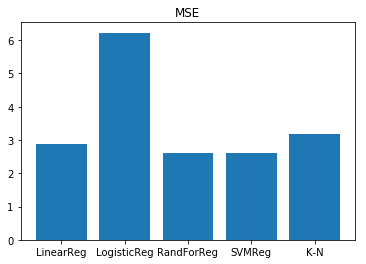

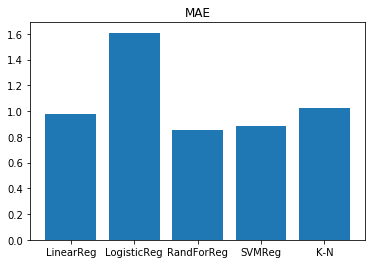

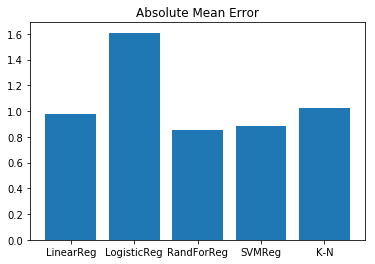

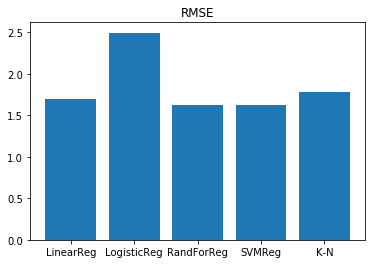

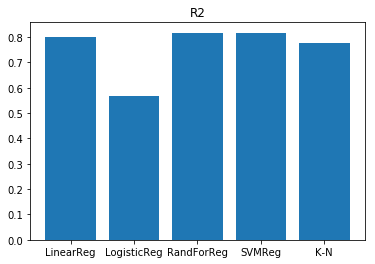

In [31]:
objects=('LinearReg','LogisticReg','RandForReg','SVMReg','K-N')
plt.bar(np.arange(len(meansqr)),meansqr)
plt.xticks(np.arange(len(meansqr)), objects)
plt.title('MSE')
plt.show()
plt.bar(np.arange(len(mae)),mae)
plt.xticks(np.arange(len(mae)), objects)
plt.title('MAE')
plt.show()
plt.bar(np.arange(len(Avgdiff)),Avgdiff)
plt.xticks(np.arange(len(Avgdiff)), objects)
plt.title('Absolute Mean Error')
plt.show()
plt.bar(np.arange(len(rmse)),rmse)
plt.xticks(np.arange(len(rmse)), objects)
plt.title('RMSE')
plt.show()
plt.bar(np.arange(len(r2)),r2)
plt.xticks(np.arange(len(r2)), objects)
plt.title('R2')
plt.show()

**得出结论**
明显感觉Logistic Regression就是不行嘛>"<

## 蟹蟹大家